In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/time-series-forecasting-with-yahoo-stock-price/yahoo_stock.csv


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [2]:
dataset = pd.read_csv('yahoo_stock.csv')
dataset.sample(10)

,Date,High,Low,Open,Close,Volume,Adj Close
1301,2019-06-16,2894.449951,2879.620117,2886.820068,2886.979980,2.922330e+09,2886.979980
576,2017-06-21,2442.229980,2430.739990,2439.310059,2435.610107,3.594820e+09,2435.610107
622,2017-08-06,2480.000000,2472.080078,2476.879883,2476.830078,3.235140e+09,2476.830078
227,2016-07-07,2109.080078,2089.389893,2100.419922,2097.899902,3.604550e+09,2097.899902
247,2016-07-27,2174.979980,2159.070068,2169.810059,2166.580078,3.995500e+09,2166.580078
928,2018-06-08,2779.389893,2763.590088,2765.840088,2779.030029,3.123210e+09,2779.030029
965,2018-07-15,2804.530029,2791.689941,2796.929932,2801.310059,2.614000e+09,2801.310059
662,2017-09-15,2500.229980,2493.159912,2495.669922,2500.229980,4.853170e+09,2500.229980
1414,2019-10-07,2959.750000,2935.679932,2944.229980,2938.790039,2.940140e+09,2938.790039
1467,2019-11-29,3150.300049,3139.340088,3147.179932,3140.979980,1.743020e+09,3140.979980


In [3]:
dataset['Date']  = pd.to_datetime(dataset['Date'])

In [4]:
dataset.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03,1825.000000
mean,2660.718673,2632.817580,2647.704751,2647.856284,3.869627e+09,2647.856284
std,409.680853,404.310068,407.169994,407.301177,1.087593e+09,407.301177
min,1847.000000,1810.099976,1833.400024,1829.079956,1.296540e+09,1829.079956
25%,2348.350098,2322.250000,2341.979980,2328.949951,3.257950e+09,2328.949951
50%,2696.250000,2667.840088,2685.489990,2683.340088,3.609740e+09,2683.340088
75%,2930.790039,2900.709961,2913.860107,2917.520020,4.142850e+09,2917.520020
max,3645.989990,3600.159912,3612.090088,3626.909912,9.044690e+09,3626.909912


<AxesSubplot:>

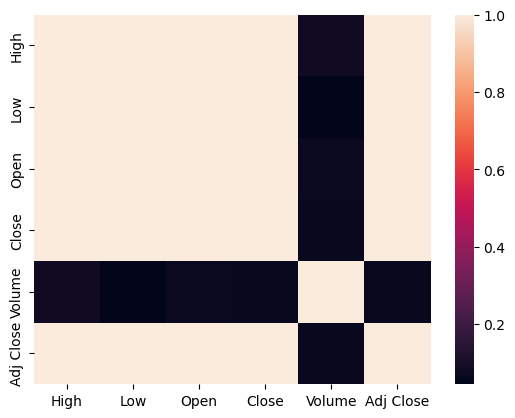

In [5]:
sns.heatmap(dataset.corr())

In [6]:
dataset.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [7]:
features = ['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']

<AxesSubplot:xlabel='Date', ylabel='High'>

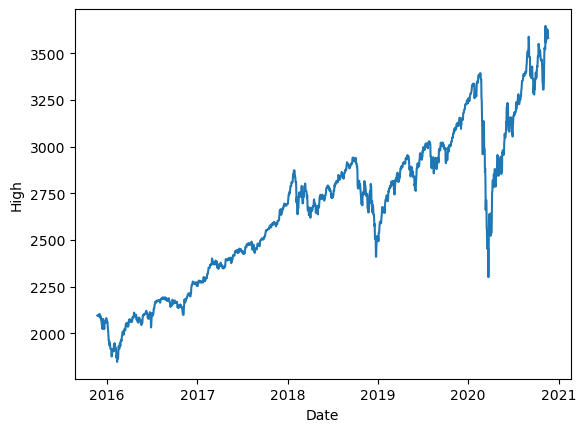

In [8]:
sns.lineplot(x='Date',y='High',data=dataset)


# Applying ARIMA

In [9]:
high_dataset = pd.DataFrame(data=dataset,columns=['High'])

In [10]:
from statsmodels.tsa.arima.model import ARIMA

In [11]:
model = ARIMA(high_dataset, order=(4,2,0))
model_fit = model.fit()

In [12]:
high_dataset.head()

,High
0,2095.610107
1,2094.120117
2,2093.000000
3,2093.000000
4,2093.290039


In [13]:
y_pred = model_fit.predict(0, len(high_dataset))
print(y_pred)

0          0.000000
1       3143.420652
2       2093.474317
3       2092.119783
4       2092.408034
           ...     
1821    3639.239218
1822    3633.267262
1823    3624.214459
1824    3581.675246
1825    3576.855096
Name: predicted_mean, Length: 1826, dtype: float64


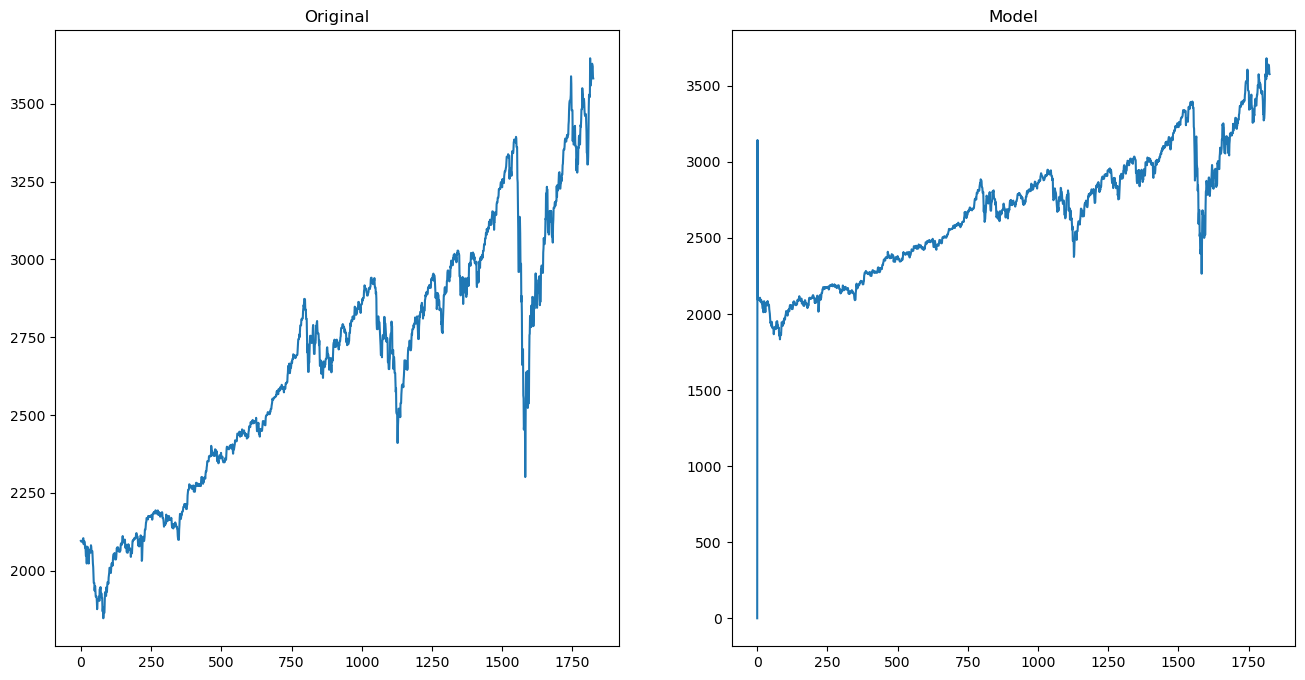

In [14]:
plt.figure(figsize=[16,8])
plt.subplot(1,2,1)
plt.title('Original')
plt.plot(high_dataset)
plt.subplot(1,2,2)
plt.title('Model')
plt.plot(y_pred)